# 1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)


In [3]:
# Librerías utilizadas en el documento
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remueve los warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Lectura de archivos
df_hom = pd.read_csv('..\data\df_homicidios.csv')
df_hom_vic = pd.read_csv('..\data\df_vic_hom.csv')

In [6]:
df_hom.head(3)


,ID_HECHO,N_VICTIMAS,FECHA,HORA,TIPO_DE_CALLE,COMUNA,XY (CABA),LONGITUD,LATITUD,VEHICULO_ACUSADO
0,2016-0001,1,2016-01-01,4.0,AVENIDA,8.0,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,AUTO
1,2016-0002,1,2016-01-02,1.0,GRAL PAZ,9.0,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,PASAJEROS
2,2016-0003,1,2016-01-03,7.0,AVENIDA,1.0,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,AUTO


In [5]:
# Cambio de tipo a la columna hora
df_hom['HORA'] = df_hom['HORA'].fillna(0).astype('int')

# cambio a formato categórico
df_hom['TIPO_DE_CALLE'] = df_hom['TIPO_DE_CALLE'].astype('category')
df_hom['COMUNA'] = df_hom['COMUNA'].astype('category')
df_hom['VEHICULO_ACUSADO'] = df_hom['VEHICULO_ACUSADO'].astype('category')

# Fecha
df_hom['FECHA'] = df_hom['FECHA'].astype('datetime64[ns]')


# cambio a float los valores de latitud y longitud
df_hom['LONGITUD'] = df_hom['LONGITUD'].astype('float')
df_hom['LATITUD'] = df_hom['LATITUD'].astype('float')

df_hom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_HECHO          696 non-null    object        
 1   N_VICTIMAS        696 non-null    int64         
 2   FECHA             696 non-null    datetime64[ns]
 3   HORA              696 non-null    int32         
 4   TIPO_DE_CALLE     696 non-null    category      
 5   COMUNA            696 non-null    category      
 6   XY (CABA)         682 non-null    object        
 7   LONGITUD          684 non-null    float64       
 8   LATITUD           684 non-null    float64       
 9   VEHICULO_ACUSADO  673 non-null    category      
dtypes: category(3), datetime64[ns](1), float64(2), int32(1), int64(1), object(2)
memory usage: 38.7+ KB


## Valores Duplicados

In [25]:
duplicado=df_hom["ID_HECHO"].duplicated().sum()

In [26]:
duplicado

0

Se ha verificado que no existen registros duplicados

## Presencia de nulos

In [28]:
df_hom.isnull().sum()

ID_HECHO             0
N_VICTIMAS           0
FECHA                0
HORA                 0
TIPO_DE_CALLE        0
COMUNA               0
XY (CABA)           14
LONGITUD            12
LATITUD             12
VEHICULO_ACUSADO    23
dtype: int64

Vemos que hay datos nulos en las columnas XY(CABA), LONGITUD, LATITUD y VEHICULO_ACUSADO. 

#### Columnas XY(CABA), LONGITUD y LATITUD

In [46]:
df_hom[df_hom['XY (CABA)'].isna()][['XY (CABA)','TIPO_DE_CALLE','LONGITUD','LATITUD']]


,XY (CABA),TIPO_DE_CALLE,LONGITUD,LATITUD
35,NaN,AUTOPISTA,-58.377146,-34.636575
38,NaN,AUTOPISTA,NaN,NaN
71,NaN,AUTOPISTA,-58.474332,-34.666850
106,NaN,AUTOPISTA,NaN,NaN
119,NaN,CALLE,NaN,NaN
139,NaN,AUTOPISTA,NaN,NaN
176,NaN,GRAL PAZ,NaN,NaN
180,NaN,AUTOPISTA,NaN,NaN
181,NaN,AUTOPISTA,NaN,NaN
256,NaN,AUTOPISTA,NaN,NaN


Vemos que algunos de los siniestros que ocurrieron en autopistas no contienen información de geocodificación, esto puede deberse a que el servicio de geocodificación posee puntos débiles(autopista y kilometrajes) así como algunos errores. Asi mismo, hay ausencia de datos en la longitud y latitud, lo que representa un 85.71% de XY(CABA).

#### Columna VEHICULO_ACUSADO

In [52]:
df_hom[df_hom['VEHICULO_ACUSADO'].isna()][['VEHICULO_ACUSADO','TIPO_DE_CALLE','FECHA','HORA','COMUNA','N_VICTIMAS']]

,VEHICULO_ACUSADO,TIPO_DE_CALLE,FECHA,HORA,COMUNA,N_VICTIMAS
3,NaN,AVENIDA,2016-01-10,0,8.0,1
32,NaN,GRAL PAZ,2016-04-11,10,13.0,1
35,NaN,AUTOPISTA,2016-04-17,0,4.0,1
38,NaN,AUTOPISTA,2016-04-20,20,13.0,1
57,NaN,GRAL PAZ,2016-06-18,6,9.0,1
76,NaN,GRAL PAZ,2016-08-07,19,9.0,1
83,NaN,AVENIDA,2016-08-24,20,9.0,1
92,NaN,AVENIDA,2016-09-04,6,12.0,1
105,NaN,AVENIDA,2016-10-24,5,14.0,1
112,NaN,AVENIDA,2016-11-06,4,8.0,1


In [58]:
df_hom['VEHICULO_ACUSADO'].isnull().sum()

23

Vemos que hay 23 datos faltantes en la columna VEHICULO_ACUSADO, la mayoría del año  (13 datos), seguido del año 2017 (4 datos), del 2019 (3 datos), 2018(2 datos) y del 2021 (1 dato).

## Visualización de Datos

In [48]:
df_hom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_HECHO          696 non-null    object        
 1   N_VICTIMAS        696 non-null    int64         
 2   FECHA             696 non-null    datetime64[ns]
 3   HORA              696 non-null    int32         
 4   TIPO_DE_CALLE     696 non-null    category      
 5   COMUNA            696 non-null    category      
 6   XY (CABA)         682 non-null    object        
 7   LONGITUD          684 non-null    float64       
 8   LATITUD           684 non-null    float64       
 9   VEHICULO_ACUSADO  673 non-null    category      
dtypes: category(3), datetime64[ns](1), float64(2), int32(1), int64(1), object(2)
memory usage: 38.7+ KB


### Cantidad de homicidios por TIPO_DE_CALLE, COMUNA, VEHICULO_ACUSADO y N_VICTIMAS

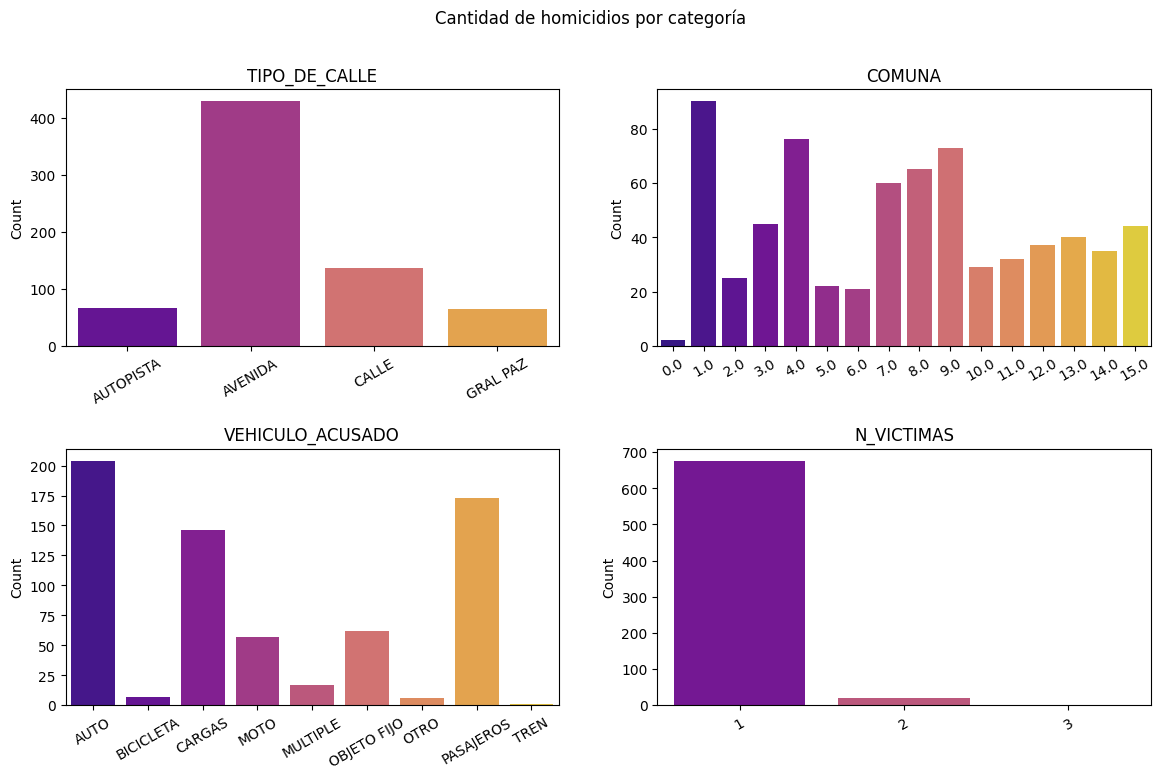

In [65]:
columnas_hom_categoricas = ["TIPO_DE_CALLE","COMUNA","VEHICULO_ACUSADO","N_VICTIMAS"]

def plot_bar_plots(df,columnas):
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    fig.suptitle('Cantidad de homicidios por categoría')
    axes = axes.flatten()
    for i, feature in enumerate(columnas):
        sns.countplot(x=df[feature], ax=axes[i], palette= 'plasma')
        axes[i].set_title(feature)
        axes[i].set_xlabel(None)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=30)
    
    # separa los plots
    plt.subplots_adjust(hspace=0.4)
  

# Plotting the bar plots
plot_bar_plots(df_hom,columnas_hom_categoricas)
plt.show()

**Subplot 1:** La mayoría de siniestro ocurrieron en autopistas. 

**Subplot 2:** La mayoría de siniestro ocurrieron en la Comuna n°1 seguida de la comuna n°4.

**Subplot 3:** La mayoría de siniestro fueron causados por un Auto. 

**Subplot 4:** La mayoría de siniestro dejaron una víctima.

### Homicidios por Año, Mes, Día y Hora

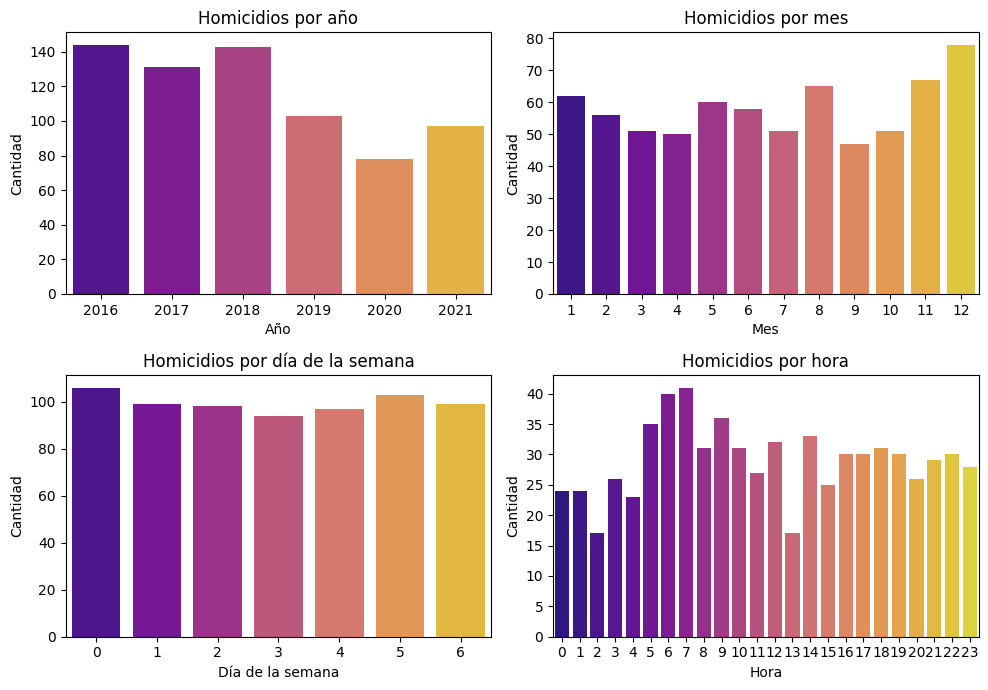

In [60]:
# SUBPLOTS DE LOS AÑOS, MESES, DIAS Y HORAS DE LOS HOMICIDIOS

# Crear el gráfico
plt.figure(figsize=(10, 7))

# Subplot 1: Count plot para los meses de la columna FECHA
plt.subplot(2, 2, 1)  
sns.countplot(x=df_hom['FECHA'].dt.year, palette='plasma')
plt.title('Homicidios por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')

# Subplot 2: Count plot para los días de la semana de la columna FECHA
plt.subplot(2, 2, 2)  
sns.countplot(x=df_hom['FECHA'].dt.month , palette='plasma')
plt.title('Homicidios por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')

# Subplot 3: Count plot para las horas de la columna HORA
plt.subplot(2, 2, 3)  
sns.countplot(x=df_hom['FECHA'].dt.dayofweek, palette='plasma')
plt.title('Homicidios por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad')

# Subplot 4: Count plot para los años de la columna FECHA
plt.subplot(2, 2, 4)  
sns.countplot(x=df_hom['HORA'], palette='plasma')
plt.title('Homicidios por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Subplot 1:** La mayoría de homicidios ocurrieron en el año 2016 y 2018

**Subplot 2:** La mayoría de homicidios ocurrieron en el mes de Diciembre

**Subplot 3:** La mayoría de homicidios ocurrieron en el día Domingo (0) y Viernes (5)

**Subplot 4:** La mayoría de homicidios ocurrieron a las 7am y 6am

In [8]:
df_hom_vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_HECHO          717 non-null    object
 1   FECHA             717 non-null    object
 2   ROL_VICTIMA       706 non-null    object
 3   VEHICULO_VICTIMA  708 non-null    object
 4   SEXO_VICTIMA      711 non-null    object
 5   GRAVEDAD          717 non-null    object
 6   RANGO_ETARIO      664 non-null    object
dtypes: object(7)
memory usage: 39.3+ KB


In [9]:
# cambio de formato a las columnas del df_hom_vic
df_hom_vic['FECHA'] = df_hom_vic['FECHA'].astype('datetime64[ns]')
df_hom_vic['ROL_VICTIMA'] = df_hom_vic['ROL_VICTIMA'].astype('category')
df_hom_vic['SEXO_VICTIMA'] = df_hom_vic['SEXO_VICTIMA'].astype('category')
df_hom_vic['RANGO_ETARIO'] = df_hom_vic['RANGO_ETARIO'].astype('category')

### Cantidad de Víctimas por ROL_VICTIMA, SEXO_VICTIMA, RANGO_ETARIO y VEHICULO_VICTIMA 

<Figure size 640x480 with 0 Axes>

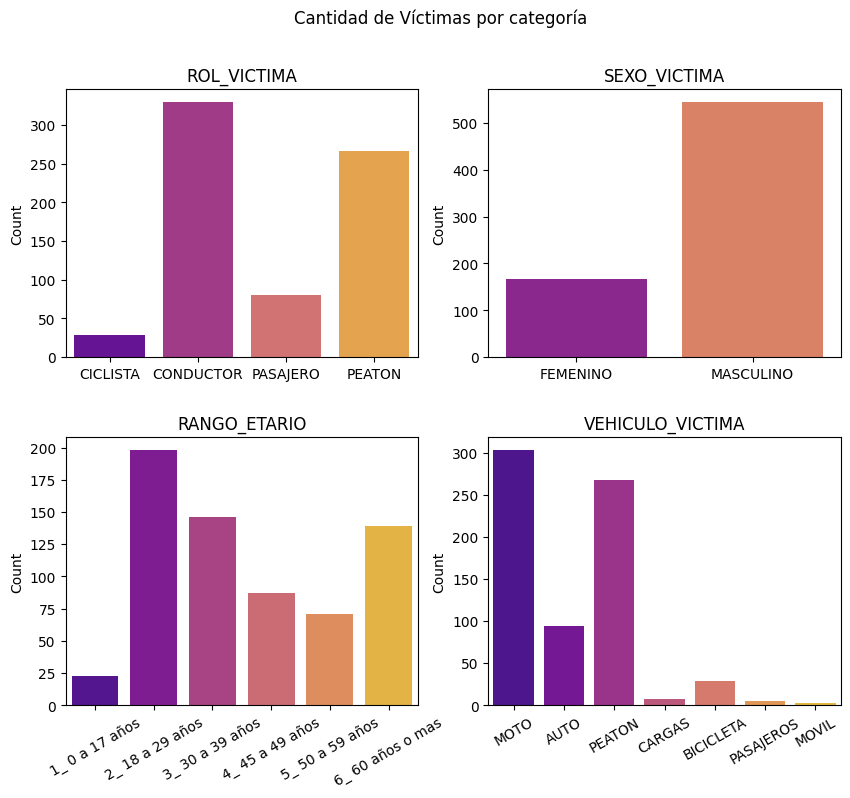

In [64]:
# Crea una función que haga plot de todas las variables categóricas

def plot_bar_plots(df,columnas):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle('Cantidad de Víctimas por categoría')
    axes = axes.flatten()
    for i, feature in enumerate(columnas):
        sns.countplot(x=df[feature], ax=axes[i], palette='plasma')
        axes[i].set_title(feature)
        axes[i].set_xlabel(None)
        axes[i].set_ylabel('Count')
        # Rota solo los labels del eje x en 30 grados solo de la gráfica RANGO_ETARIO
        if feature == 'RANGO_ETARIO' or feature == 'VEHICULO_VICTIMA':
            axes[i].tick_params(axis='x', rotation=30)
    
    
    # separa los plots
    plt.subplots_adjust(hspace=0.3)

plt.tight_layout()

# crea una lista con las columnas categóricas
columnas_hom_categoricas = ["ROL_VICTIMA","SEXO_VICTIMA","RANGO_ETARIO","VEHICULO_VICTIMA"]

# Plotting the bar plots
plot_bar_plots(df_hom_vic,columnas_hom_categoricas)
plt.show()

**Subplot 1:** La mayoría de víctimas fueron conductores

**Subplot 2:** La mayoría de víctimas fueron del género masculino

**Subplot 3:** La mayoría de víctimas tenían entre 18 y 29 años

**Subplot 4:** La mayoría de víctimas eran motorizados

In [12]:
df_les = pd.read_csv('..\data\df_lesiones.csv')
df_les_vic = pd.read_csv('..\data\df_vic_les.csv')

In [66]:
df_les.sample(3)

,ID_HECHO,N_VICTIMAS,FECHA,HORA,COMUNA,TIPO_DE_CALLE,XY (CABA),LONGITUD,LATITUD,VEHICULO_ACUSADO
17543,LC-2021-0057884,5,2021-02-08,17,8.0,CALLE,Point (99443.2337058313 93900.5073426792),-58.469376,-34.684253,AUTO
9537,LC-2019-0757383,1,2019-12-01,6,1.0,NaN,Point (107547.18650599344982766 100787.0378421...,-58.381002,-34.622148,NaN
7150,LC-2019-0541749,1,2019-08-29,21,15.0,NaN,Point (101426.11141316204157192 102733.4149696...,-58.447752,-34.604629,NaN


In [14]:
# Cambio de tipo a la columna hora
df_les['HORA'] = df_les['HORA'].fillna(0).astype('int')

# cambio a formato categórico
df_les['TIPO_DE_CALLE'] = df_les['TIPO_DE_CALLE'].astype('category')
df_les['COMUNA'] = df_les['COMUNA'].astype('category')
df_les['VEHICULO_ACUSADO'] = df_les['VEHICULO_ACUSADO'].astype('category')

# FECHA
df_les['FECHA'] = df_les['FECHA'].astype('datetime64[ns]')

df_les.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_HECHO          23785 non-null  object        
 1   N_VICTIMAS        23785 non-null  int64         
 2   FECHA             23785 non-null  datetime64[ns]
 3   HORA              23785 non-null  int32         
 4   COMUNA            22328 non-null  category      
 5   TIPO_DE_CALLE     12740 non-null  category      
 6   XY (CABA)         22533 non-null  object        
 7   LONGITUD          22314 non-null  float64       
 8   LATITUD           22314 non-null  float64       
 9   VEHICULO_ACUSADO  8497 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(2), int32(1), int64(1), object(2)
memory usage: 1.2+ MB


### Cantidad de lesiones por TIPO_DE_CALLE, COMUNA, VEHICULO_ACUSADO y N_VICTIMAS

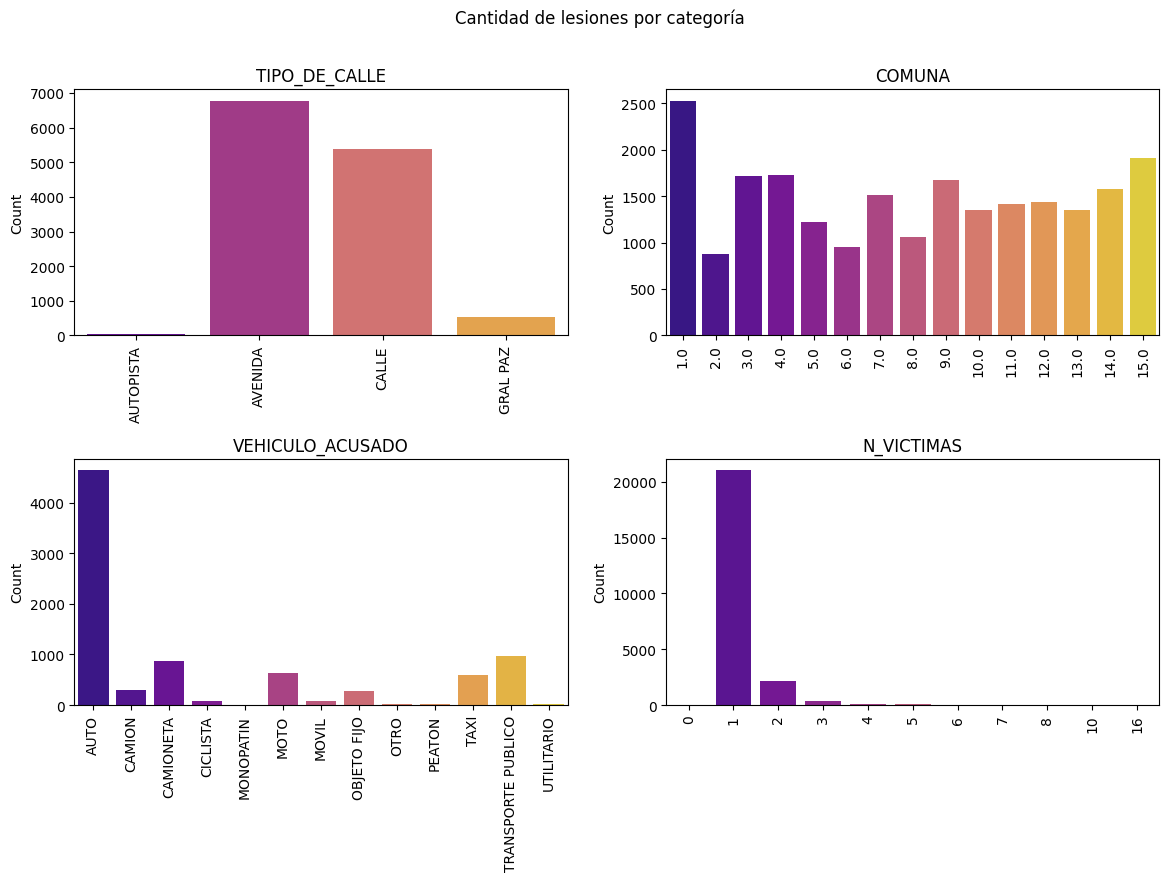

In [67]:
columnas_les_categoricas = ["TIPO_DE_CALLE","COMUNA","VEHICULO_ACUSADO","N_VICTIMAS"]

def plot_bar_plots2(df,columnas):
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    fig.suptitle('Cantidad de lesiones por categoría')
    axes = axes.flatten()
    for i, feature in enumerate(columnas):
        sns.countplot(x=df[feature], ax=axes[i], palette=	'plasma')
        axes[i].set_title(feature)
        axes[i].set_xlabel(None)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=90)
    
    # separa los plots
    plt.subplots_adjust(hspace=0.5)

# Plotting the bar plots
plot_bar_plots2(df_les,columnas_les_categoricas)
plt.show()

**Subplot 1:** La mayoría de lesiones fueron en una avenida

**Subplot 2:** La mayoría de lesiones fueron en la comuna N° 1

**Subplot 3:** La mayoría de lesiones fueron causadas por un auto

**Subplot 4:** La mayoría de lesiones fue una víctima

### Cantidad de lesiones po Año, Mes, Día y  Hora

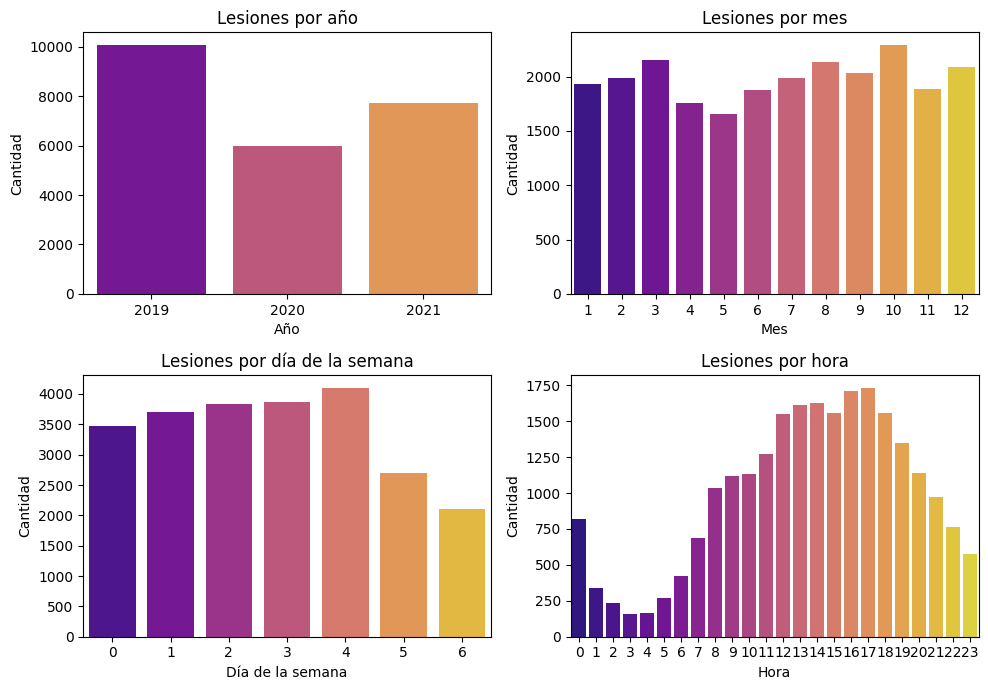

In [68]:
# SUBPLOTS DE LOS AÑOS, MESES, DIAS Y HORAS DE LOS HOMICIDIOS

# Crear el gráfico
plt.figure(figsize=(10, 7))

# Subplot 1: Count plot para los meses de la columna FECHA
plt.subplot(2, 2, 1)
sns.countplot(x=df_les['FECHA'].dt.year, palette='plasma')
plt.title('Lesiones por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')

# Subplot 2: Count plot para los días de la semana de la columna FECHA
plt.subplot(2, 2, 2)
sns.countplot(x=df_les['FECHA'].dt.month , palette='plasma')
plt.title('Lesiones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')

# Subplot 3: Count plot para las horas de la columna HORA
plt.subplot(2, 2, 3)
sns.countplot(x=df_les['FECHA'].dt.dayofweek, palette='plasma')
plt.title('Lesiones por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad')

# Subplot 4: Count plot para los años de la columna FECHA
plt.subplot(2, 2, 4)
sns.countplot(x=df_les['HORA'], palette='plasma')
plt.title('Lesiones por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Subplot 1:** La mayoría de lesiones ocurrieron en el año 2019

**Subplot 2:** La mayoría de lesiones ocurrieron en el mes de Octubre

**Subplot 3:** La mayoría de lesiones ocurrieron en el día Jueves (4)

**Subplot 4:** La mayoría de lesiones ocurrieron a las 17hrs

In [17]:
df_les_vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_HECHO          27605 non-null  object 
 1   FECHA             27605 non-null  object 
 2   VEHICULO_VICTIMA  11333 non-null  object 
 3   SEXO_VICTIMA      25377 non-null  object 
 4   EDAD_VICTIMA      23134 non-null  float64
 5   GRAVEDAD          27605 non-null  object 
 6   ROL_VICTIMA       0 non-null      float64
 7   RANGO_ETARIO      23134 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.7+ MB


In [18]:
# cambio de formato a las columnas del df_hom_vic
df_les_vic['FECHA'] = df_les_vic['FECHA'].astype('datetime64[ns]')
df_les_vic['SEXO_VICTIMA'] = df_les_vic['SEXO_VICTIMA'].astype('category')
df_les_vic['RANGO_ETARIO'] = df_les_vic['RANGO_ETARIO'].astype('category')

### Cantidad de lesiones por SEXO_VICTIMA, RANGO_ETARIO y VEHICULO_VICTIMA

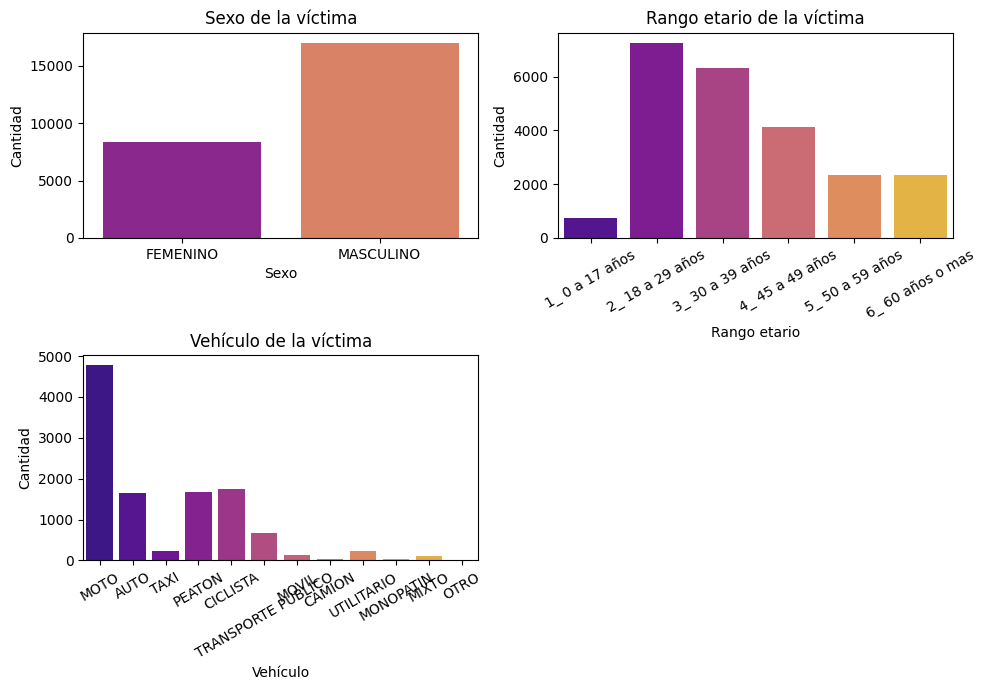

In [98]:
# SUBPLOTS DE LAS COLUMNAS CATEGÓRICAS DEL DF_LES_VIC
#XYZ = ["ROL_VICTIMA","SEXO_VICTIMA","RANGO_ETARIO","VEHICULO_VICTIMA"]

# Crear el gráfico
plt.figure(figsize=(10, 7))

# Subplot 1: 
plt.subplot(2, 2, 1)
sns.countplot(x=df_les_vic['SEXO_VICTIMA'] , palette='plasma')
plt.title('Sexo de la víctima')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')

# Subplot : 
plt.subplot(2, 2, 2)
sns.countplot(x=df_les_vic['RANGO_ETARIO'], palette='plasma')
# rotar los labels del eje x en 90 grados
plt.xticks(rotation=30)
plt.title('Rango etario de la víctima')
plt.xlabel('Rango etario')
plt.ylabel('Cantidad')

# Subplot 4:
plt.subplot(2, 2, 3)
sns.countplot(x=df_les_vic['VEHICULO_VICTIMA'], palette='plasma')
plt.xticks(rotation=30)
plt.title('Vehículo de la víctima')
plt.xlabel('Vehículo')
plt.ylabel('Cantidad')

# Subplot 4: borrar el subplot
plt.subplot(2, 2, 4)
plt.axis('off') 

# Separar los subplots
plt.subplots_adjust(hspace=0.5)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Subplot 1:** La mayoría de lesiones fueron del género masculino

**Subplot 2:** La mayoría de lesiones se encuentran en el rango etario de 18 a 29 años

**Subplot 3:** La mayoría de lesiones fueron de motorizados

### Outliers
Se realiza la busqueda de datos con valores atípicos en las features, y se analiza si es necesario eliminarlos.

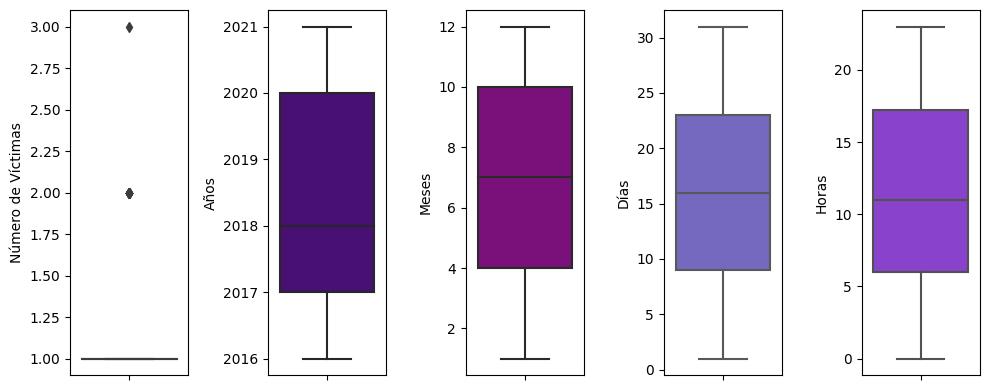

In [128]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 4))

# Crear subplots para los gráficos 
plt.subplot(1, 5, 1) 
sns.boxplot(data=df_hom, y='N_VICTIMAS', color = "#483D8B")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=df_hom, y=df_hom['FECHA'].dt.year, color = "#4B0082")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=df_hom, y=df_hom['FECHA'].dt.month, color = "#8B008B")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=df_hom, y=df_hom['FECHA'].dt.day, color = "#6A5ACD")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.boxplot(data=df_hom, y='HORA', color = "#8A2BE2")
            #87CEEB")
plt.ylabel('Horas')

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.show()


#sns.countplot(x=df_les['FECHA'].dt.month , palette='plasma')

Los Outliers que se encuentran en feature N_VICTIMAS (valores 2 ó 3), se producen debido a que en la mayoria de los casos el registro es el valor uno (1); con respecto a las victimas en los siniestros.

### Distribución etaria de víctimas según Sexo

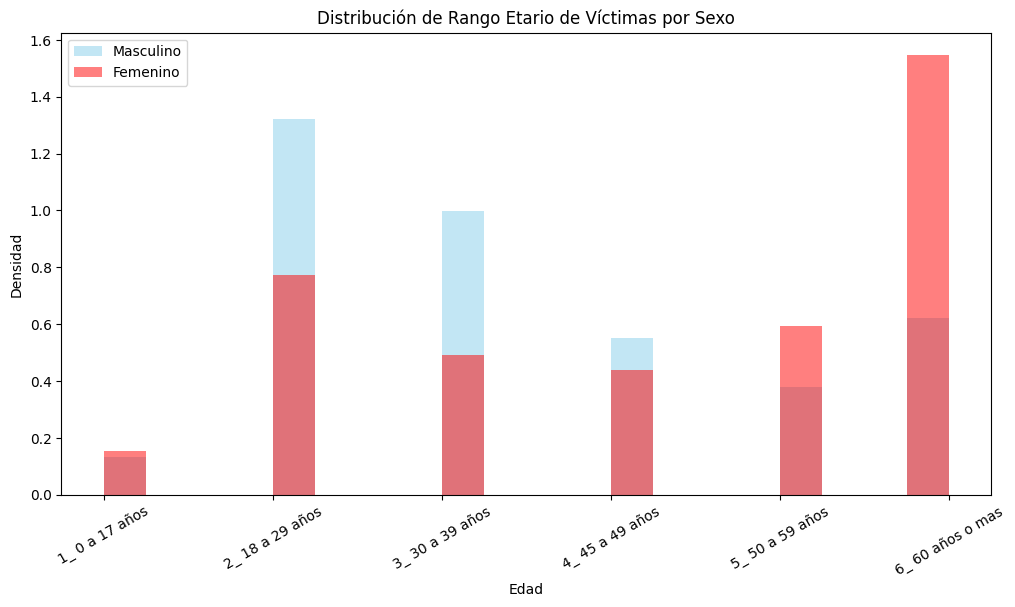

In [88]:
# Filtrar por sexo masculino
masculino = df_hom_vic[df_hom_vic['SEXO_VICTIMA'] == 'MASCULINO']['RANGO_ETARIO'].dropna()

# Filtrar por sexo femenino
femenino = df_hom_vic[df_hom_vic['SEXO_VICTIMA'] == 'FEMENINO']['RANGO_ETARIO'].dropna()


df_hom_vic.sort_values(by='RANGO_ETARIO', ascending=False, inplace=True)
# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(masculino, bins=20, alpha=0.5, color='skyblue', label='Masculino', density=True)
plt.hist(femenino, bins=20, alpha=0.5, color='red', label='Femenino', density=True)
plt.xticks(rotation=30)
plt.title('Distribución de Rango Etario de Víctimas por Sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

El gráfico muestra dos histogramas sobre el mismo eje a fin de poder comparar de manera más visual la diferencia entre las víctimas de ambos sexos.
* Las víctimas del sexo masculino predominan en el rango etario de 18 a 29 años
* Las víctimas del sexo femenino predominan en el rango etario de 60 años a más

### Proporción de víctimas por Sexo

Text(0.5, 1.0, 'Proporción de Víctimas por Sexo')

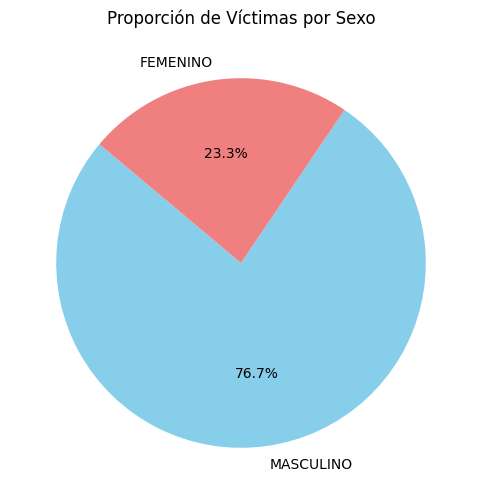

In [89]:
# Calcular la proporción de víctimas por sexo
proporcion = df_hom_vic['SEXO_VICTIMA'].value_counts(normalize=True) * 100

# Preparar los datos para el gráfico de torta
labels = proporcion.index
sizes = proporcion.values

# Crear el gráfico de torta
plt.figure(figsize=(12, 6))

# Gráfico de torta

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Víctimas por Sexo')

Observamos que el 76.7% de víctimas son del género masculino

### Distribución de los roles de las víctimas por Sexo

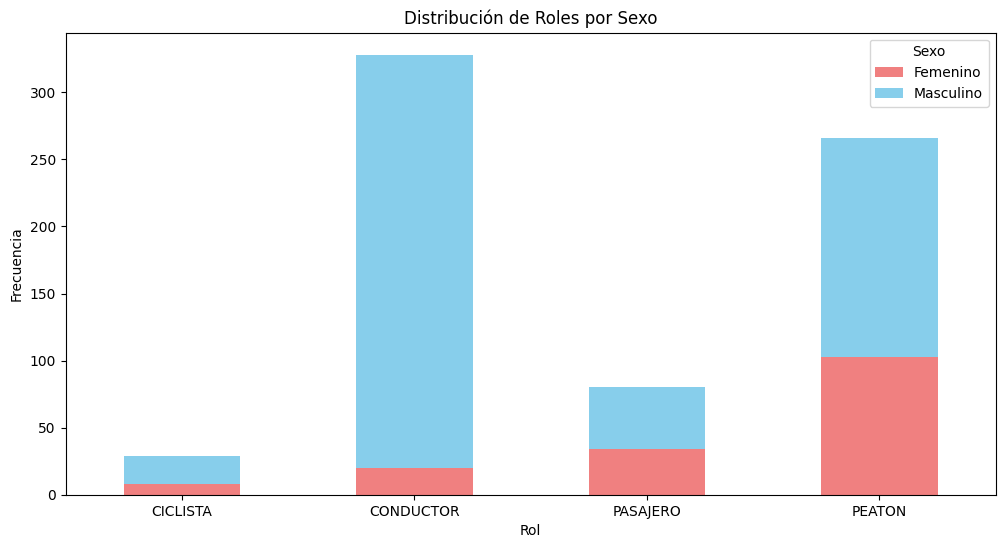

In [91]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df_hom_vic['ROL_VICTIMA'], df_hom_vic['SEXO_VICTIMA'])

# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])
plt.title('Distribución de Roles por Sexo')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

El gráfico muestra:
* La mayor cantidad de víctimas tienen como rol Conductor, seguida por Peatón 
* Para las víctimas de sexo Masculino, el rol más frecuente en los siniestros es como conductor, seguido por peatón.
* Para las víctimas de sexo Femenino, el rol más frecuente en los siniestros es como peatón, seguido por pasajero.

### Distribucíon de víctimas según sexo y tipo de vehículo

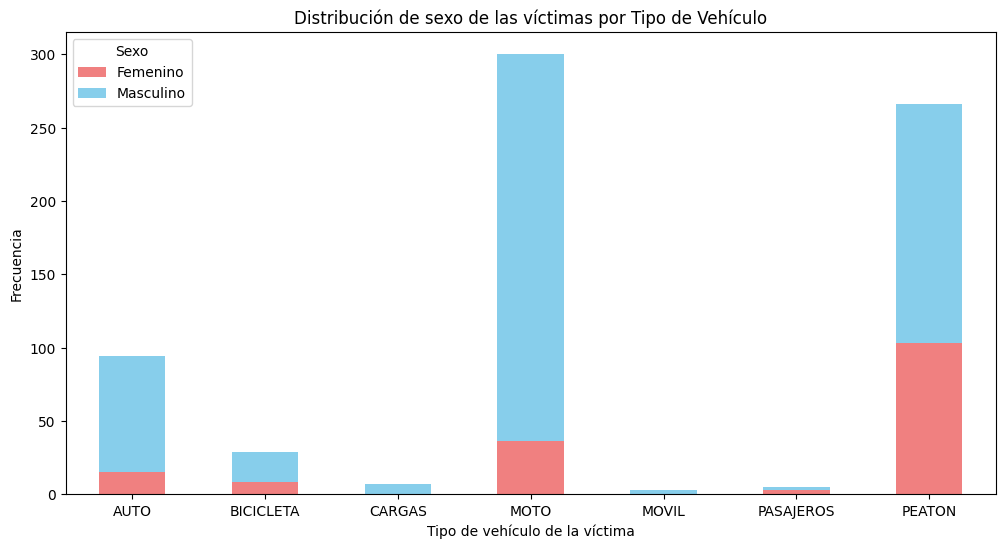

In [94]:
# Crear una tabla de contingencia 
tabla_contingencia = pd.crosstab(df_hom_vic['VEHICULO_VICTIMA'], df_hom_vic['SEXO_VICTIMA'])

# Crear un gráfico de barras apiladas
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(12, 6), color=["lightcoral",'skyblue'])
plt.title('Distribución de sexo de las víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de vehículo de la víctima')
plt.ylabel('Frecuencia')

# Agregar una leyenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Femenino', 'Masculino'], title='Sexo')

plt.xticks(rotation=0)
plt.show()

* La mayor cantidad de accidentes con víctimas fatales son en Moto y además con más proporción del sexo Masculino
* Los Peatones, son el segundo tipo de víctima, en el que la mayor proporción son de sexo Masculino pero con menor diferencia que en la anterior.